In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn import metrics                           
from sklearn import tree
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set(color_codes=True) 
import sklearn.preprocessing as preproc
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from scipy import stats
import statistics as stats
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing
import math
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from scipy.stats import ttest_ind
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [3]:
df = pd.read_csv('HR_employee_attrition.csv')
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
dataset_size = df.shape
print("Dataset size: {} rows, {} columns".format(dataset_size[0], dataset_size[1]))

missing_data = df.isnull().sum()
print("Missing data:\n{}".format(missing_data))

Dataset size: 1470 rows, 35 columns
Missing data:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany      

In [5]:
total_nan_values = df.isnull().sum().sum()
print("Total number of NaN values: {}".format(total_nan_values))

Total number of NaN values: 0


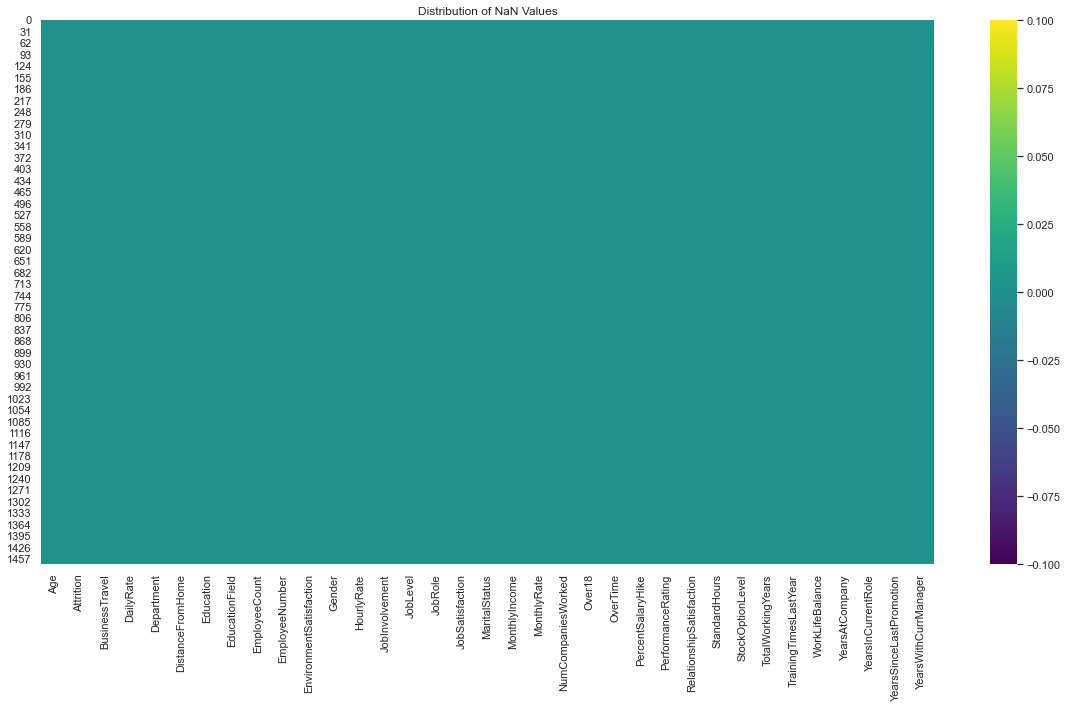

In [6]:
missing_values = df.isnull().sum()

plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Distribution of NaN Values')
plt.show()

In [7]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
duplicates = df['EmployeeNumber'].duplicated()
num_duplicates = duplicates.sum()
num_duplicates

0

### The dataset consists of 1470 rows and 35 columns. Dataset doesn't contain missing values, no duplicates so no further processing is needed. The target value of the dataset is variable "Attrition".

# 

# Exploratory Data Analytics

In [9]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

Out of all of these variables, there are 4 of them that don't bring any use or value to the models I will create so I will just drop them. These columns are: "EmployeeNumber" as it's unique variable and I don't need employee IDs to get reason for attrition, "EmployeeCount", "Over18" and "StandardHours" as they have 1 unique value only each. 

### Dropping unnecessary features

In [10]:
df = df.drop(["EmployeeNumber", "EmployeeCount", "Over18", "StandardHours"], axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

### Getting list of numerical and categorical variables

In [12]:
categorical_cols = [col for col in df.columns if df[col].dtype == "object"]
print("names of categorical columns: ", categorical_cols)

names of categorical columns:  ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [13]:
numerical_cols = [col for col in df.columns if df[col].dtype == "float64" or df[col].dtype == "int64"]
print("Names of numerical columns:", numerical_cols)

Names of numerical columns: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


### Check number of unique values in categorical variables

In [14]:
df[categorical_cols].nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64

### Unique values of categorical variables

In [15]:
# Attrition

df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [16]:
# BusinessTravel

df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [17]:
# Department

df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [18]:
# EducationField

df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [19]:
# Gender

df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [20]:
# JobRole

df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [21]:
# MaritalStatus

df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [22]:
# OverTime

df['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

### Conclusion

"Attrition", "Gender" and " OverTime" have 2 values only (Yes/No or Female/Male), therefore, they need binary encoding. 
"BusinessTravel" is ordinal variable and needs ordinal encoding. 
All other variables ("Department", "EducationField", "JobRole" and "MaritalStatus") are nominal variables and will need categorical encoding. 

# 

# Visualisations

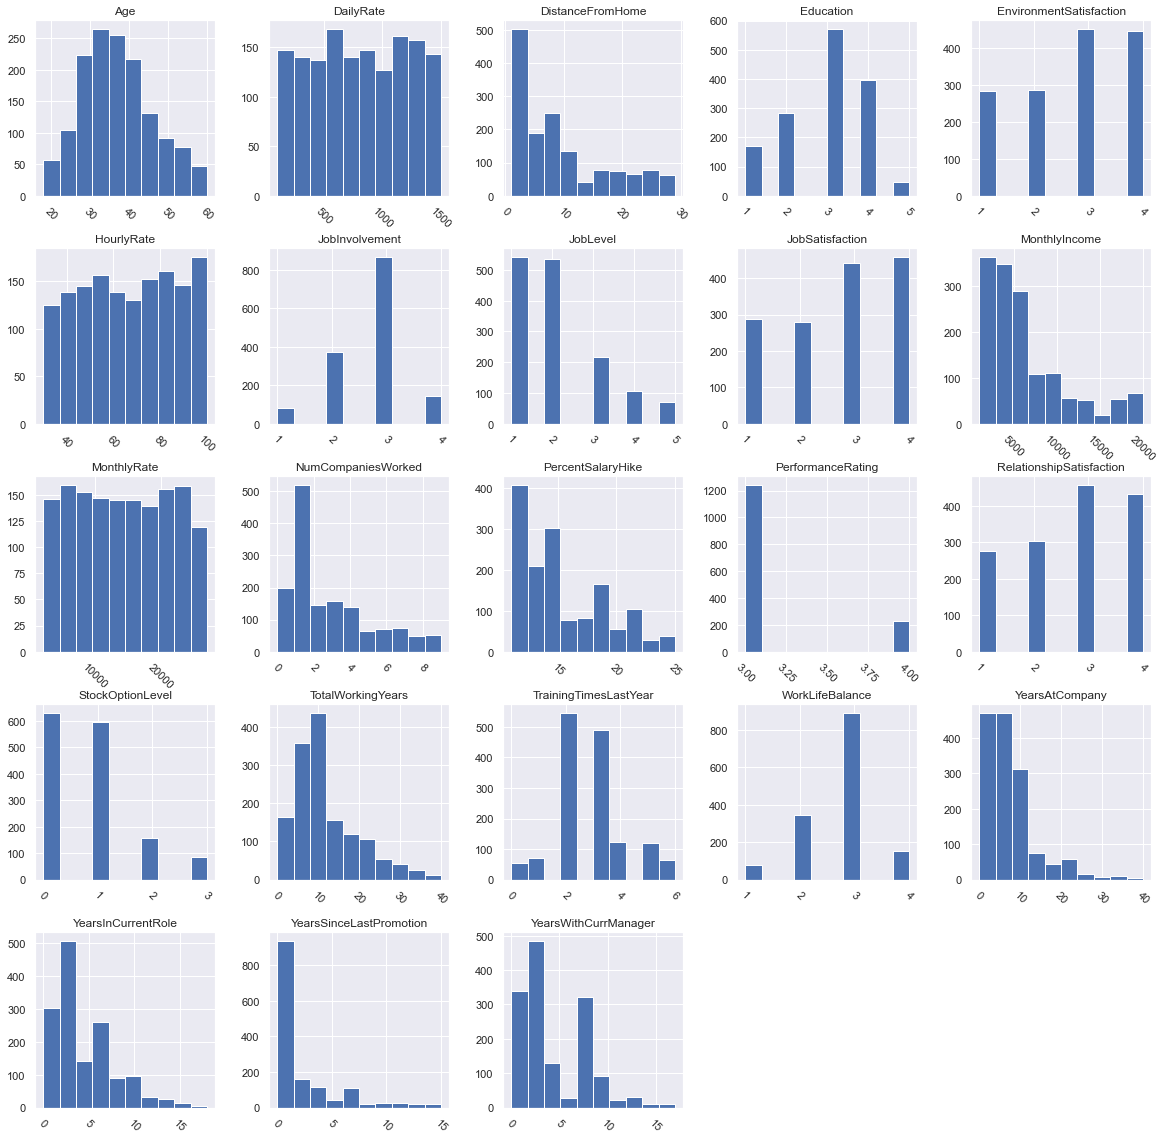

In [23]:
df.hist(figsize=(20,20), xrot=-45)
plt.show()

In [24]:
#!pip install plotly

In [25]:
fig = px.histogram(df, x='Age',
                   title='Age Countplot')
fig.update_layout(xaxis_title='Age', yaxis_title='Count')
fig.update_traces(marker=dict(color='blue'))

fig.show()

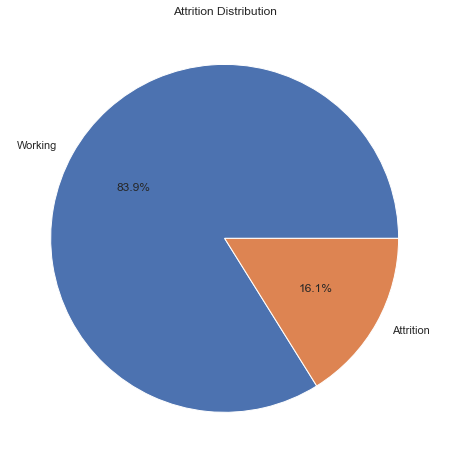

In [26]:
plt.figure(figsize=(10, 8))
attrition_counts = df['Attrition'].value_counts()
labels = ['Working', 'Attrition']
plt.pie(attrition_counts, labels=labels, autopct='%1.1f%%')
plt.title('Attrition Distribution')
plt.show()

The chart shows the percentage of employees who have left the company versus those who have not. In this case, we can see that 16.1% of employees in the dataset have left the company, while the remaining 83.9% are still employed.

In [27]:
grouped_gender = df.groupby(['Attrition', 'Gender']).size().reset_index(name='Count')

fig = go.Figure(data=[
    go.Bar(name='Male', x=grouped_gender[grouped_gender['Gender'] == 'Male']['Attrition'], y=grouped_gender[grouped_gender['Gender'] == 'Male']['Count']),
    go.Bar(name='Female', x=grouped_gender[grouped_gender['Gender'] == 'Female']['Attrition'], y=grouped_gender[grouped_gender['Gender'] == 'Female']['Count'])
])

fig.update_layout(
    title='Attrition by Gender',
    xaxis_title='Attrition',
    yaxis_title='Count'
)

fig.show()

In this plot, we can see that men are leaving the company more than women.

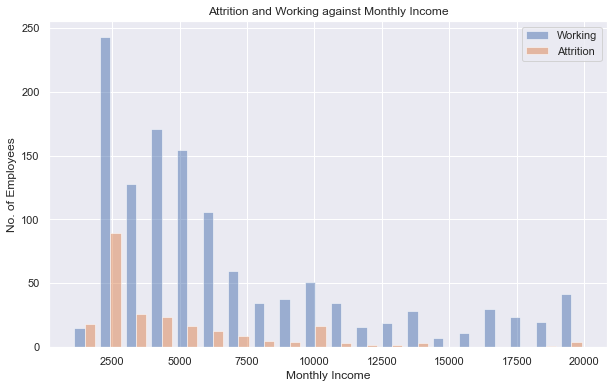

In [28]:
plt.figure(figsize=(10, 6)) 
plt.hist([df[df['Attrition']=='No']['MonthlyIncome'], df[df['Attrition']=='Yes']['MonthlyIncome']],
         bins=20, alpha=0.5, label=['Working', 'Attrition'])

plt.xlabel('Monthly Income')
plt.ylabel('No. of Employees')
plt.title('Attrition and Working against Monthly Income')

plt.legend()

plt.show()

Highest attrition is among employees that work on salary of 2500, but also, that is the salary the most employes are getting as well. People that are leaving the company were mostly getting lower salaries - between 2500 and 5000. 

In [29]:
counts = df.groupby(['JobLevel', 'Attrition']).size().reset_index(name='Count')

pivoted_counts = counts.pivot(index='JobLevel', columns='Attrition', values='Count')

fig = go.Figure()

fig.add_trace(go.Bar(x=pivoted_counts.index, y=pivoted_counts['No'], name='Working', marker=dict(color='blue')))
fig.add_trace(go.Bar(x=pivoted_counts.index, y=pivoted_counts['Yes'], name='Attrition', marker=dict(color='red')))

fig.update_layout(title='Attrition and Working by Job Level',
                  xaxis_title='Job Level',
                  yaxis_title='No. of Employees',
                  barmode='group')


fig.show()

Attrtition rate is the highest on job level 1. Most people working in the company are on the level 2. 
Levels 4 and 5 have lowest level of attrition, but also, those are the levels with the lowest amount of people working at.

In [30]:
counts = df.groupby(['Age', 'Attrition']).size().reset_index(name='Count')

pivoted_counts = counts.pivot(index='Age', columns='Attrition', values='Count')

fig = go.Figure()

fig.add_trace(go.Bar(x=pivoted_counts.index, y=pivoted_counts['No'], name='Working'))
fig.add_trace(go.Bar(x=pivoted_counts.index, y=pivoted_counts['Yes'], name='Attrition'))

fig.update_layout(title='Attrition and Working by Age',
                  xaxis_title='Age',
                  yaxis_title='No. of Employee',
                  barmode='group')


fig.show()

Highest attrition comes around age 30. In this situation specificaly, for age 29 and 31. Attrition is low or non-existing for older employees. 

# 

In [31]:
counts = df.groupby(['TotalWorkingYears', 'Attrition']).size().reset_index(name='Count')

pivoted_counts = counts.pivot(index='TotalWorkingYears', columns='Attrition', values='Count')

fig = go.Figure()

fig.add_trace(go.Bar(x=pivoted_counts.index, y=pivoted_counts['No'], name='Working'))

fig.add_trace(go.Bar(x=pivoted_counts.index, y=pivoted_counts['Yes'], name='Attrition'))

fig.update_layout(
    title='Attrition and Working against Total Working Years',
    xaxis_title='Total Working Years',
    yaxis_title='No. of Employee',
    barmode='group'
)

# Show the plot
fig.show()

Highest attrition comes from employees that just started working, the ones who worked 1 year only. Once employees pass 10 years of work, attrition is really low.

In [32]:
counts = df.groupby(['DistanceFromHome', 'Attrition']).size().reset_index(name='Count')

pivoted_counts = counts.pivot(index='DistanceFromHome', columns='Attrition', values='Count')

fig = go.Figure(data=[
    go.Bar(name='Working', x=pivoted_counts.index, y=pivoted_counts['No']),
    go.Bar(name='Attrition', x=pivoted_counts.index, y=pivoted_counts['Yes'])
])

fig.update_layout(
    title='Attrition and Working against Distance From Home',
    xaxis_title='Distance From Home',
    yaxis_title='No. of Employee'
)

# Show the plot
fig.show()

The highest attrition comes from employees that live closest to work.

In [33]:
counts = df.groupby(['JobSatisfaction', 'Attrition']).size().reset_index(name='Count')

pivoted_counts = counts.pivot(index='JobSatisfaction', columns='Attrition', values='Count')

fig = go.Figure(data=[
    go.Bar(name='Working', x=pivoted_counts.index, y=pivoted_counts['No']),
    go.Bar(name='Attrition', x=pivoted_counts.index, y=pivoted_counts['Yes'])
])

fig.update_layout(
    title='Attrition and Working against Job Satisfaction',
    xaxis_title='Job Satisfaction',
    yaxis_title='No. of Employee'
)

# Show the plot
fig.show()

It's clear from this plot that job satisfaction rating doesn't affect Attrition much, it's evenly distributed among all the satisfaction levels. However, it is also visible that the most of the employees marked satisfaction with highest level.

In [34]:
df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [35]:
job_roles = ['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 
             'Manager', 'Manufacturing Director', 'Research Director', 
             'Research Scientist', 'Sales Executive', 'Sales Representative']

df_job_roles = df[df['JobRole'].isin(job_roles)][['JobRole', 'Attrition']]

df_grouped = df_job_roles.groupby(['Attrition', 'JobRole']).size().unstack()

df_grouped.index = ['Working', 'Attrition']

fig = go.Figure()

for row in df_grouped.index:
    fig.add_trace(go.Bar(x=df_grouped.columns, y=df_grouped.loc[row], name=row))

fig.update_layout(
    title='Attrition and Working against Job Role',
    xaxis_title='Job Role',
    yaxis_title='Count'
)

fig.show()

This chart shows that Lab Tehnicians are the ones with highest Attrition. The roles that leaves the least are Research Director and Manager.

In [36]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [37]:
travel_cols = ['Attrition', 'BusinessTravel']
df_travel = df[travel_cols].copy()

grouped = df_travel.groupby(travel_cols).size().reset_index(name='Count')

pivoted = grouped.pivot(index='BusinessTravel', columns='Attrition', values='Count')
pivoted = pivoted.reset_index()

fig = go.Figure(data=[
    go.Bar(name='Working', x=pivoted['BusinessTravel'], y=pivoted['No']),
    go.Bar(name='Attrition', x=pivoted['BusinessTravel'], y=pivoted['Yes'])
])

fig.update_layout(
    title='Attrition and Working against Business Travel',
    xaxis_title='Business Travel',
    yaxis_title='No. of Employees'
)

fig.show()

This chart shows that most of the employees travel rarely and the highest Attrition is among them.

In [38]:
marital_cols = ['Attrition', 'MaritalStatus']
df_marital = df[marital_cols].copy()

grouped = df_marital.groupby(marital_cols).size().reset_index(name='Count')

pivoted = grouped.pivot(index='MaritalStatus', columns='Attrition', values='Count')
pivoted = pivoted.reset_index()

fig = go.Figure(data=[
    go.Bar(name='Working', x=pivoted['MaritalStatus'], y=pivoted['No']),
    go.Bar(name='Attrition', x=pivoted['MaritalStatus'], y=pivoted['Yes'])
])

fig.update_layout(
    title='Attrition and Working against Marital Status',
    xaxis_title='Marital Status',
    yaxis_title='No. of Employees'
)

fig.show()

This plot shows that employees who are single have a higher attrition rate than employees who are married or divorced. Also, it shows that most of the employees are married. 

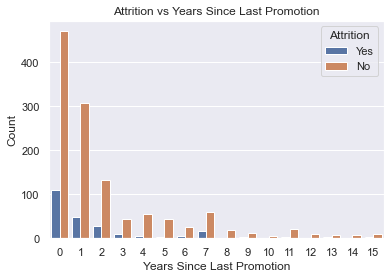

In [39]:
sns.countplot(x='YearsSinceLastPromotion', hue='Attrition', data=df)

plt.xlabel('Years Since Last Promotion')
plt.ylabel('Count')
plt.title('Attrition vs Years Since Last Promotion')
plt.show()

Highest attrition comes from employees who didn't have promotion.

# 

# Data Encoding 

In [40]:
df = df.replace({
    "Attrition": {"No": 0, "Yes": 1},
    "Gender": {"Female": 0, "Male": 1},
    "OverTime": {"No": 0, "Yes": 1}
})

### One-hot encoding
"Department" and "MaritalStatus" are nominal variables with more than 2 unique values and one-hot encoding is needed in this case.

In [41]:
columns_to_encode = ["Department", "MaritalStatus"]

df = pd.get_dummies(df, columns=columns_to_encode)

print(df.head())

   Age  Attrition     BusinessTravel  DailyRate  DistanceFromHome  Education  \
0   41          1      Travel_Rarely       1102                 1          2   
1   49          0  Travel_Frequently        279                 8          1   
2   37          1      Travel_Rarely       1373                 2          2   
3   33          0  Travel_Frequently       1392                 3          4   
4   27          0      Travel_Rarely        591                 2          1   

  EducationField  EnvironmentSatisfaction  Gender  HourlyRate  ...  \
0  Life Sciences                        2       0          94  ...   
1  Life Sciences                        3       1          61  ...   
2          Other                        4       1          92  ...   
3  Life Sciences                        4       0          56  ...   
4        Medical                        1       1          40  ...   

   YearsAtCompany  YearsInCurrentRole YearsSinceLastPromotion  \
0               6                

### Ordinal encoding
"BusinessTravel" variable is an ordinal variable since the levels are ordered (on rarely, frequently and not traveling at all) and ordinal encoding is needed in this case.

In [42]:
business_travel_order = ['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']

ordinal_encoder = OrdinalEncoder(categories=[business_travel_order])

df['BusinessTravel_encoded'] = ordinal_encoder.fit_transform(df[['BusinessTravel']])

df['BusinessTravel_encoded'] = df['BusinessTravel_encoded'].astype('int64')

df.drop('BusinessTravel', axis=1, inplace=True)

print(df.head())

   Age  Attrition  DailyRate  DistanceFromHome  Education EducationField  \
0   41          1       1102                 1          2  Life Sciences   
1   49          0        279                 8          1  Life Sciences   
2   37          1       1373                 2          2          Other   
3   33          0       1392                 3          4  Life Sciences   
4   27          0        591                 2          1        Medical   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  ...  \
0                        2       0          94               3  ...   
1                        3       1          61               2  ...   
2                        4       1          92               2  ...   
3                        4       0          56               3  ...   
4                        1       1          40               3  ...   

   YearsInCurrentRole YearsSinceLastPromotion  YearsWithCurrManager  \
0                   4                       0

### Categorical encoding
Rest of the categorical variables ("EducationField" and "JobRole") are nominal variables that show different levels without any ordering, therefore those need categorical encoding. However, in order to avoid curse of dimensionality and having too many columns, I will replace categorical values with numerical ones using the list of unique values for both of these variables. 

In [43]:
df = df.replace({
    "EducationField": {"Other": 0, "Life Sciences": 1, "Medical": 2, "Marketing": 3, "Technical Degree": 4, "Human Resources": 5},
    "JobRole": {"Sales Executive": 0, "Research Scientist": 1, "Laboratory Technician": 2, "Manufacturing Director": 3, "Healthcare Representative": 4, "Manager": 5, "Sales Representative": 6, "Research Director": 7, "Human Resources": 8}
})

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EducationField                     1470 non-null   int64
 6   EnvironmentSatisfaction            1470 non-null   int64
 7   Gender                             1470 non-null   int64
 8   HourlyRate                         1470 non-null   int64
 9   JobInvolvement                     1470 non-null   int64
 10  JobLevel                           1470 non-null   int64
 11  JobRole                            1470 non-null   int64
 12  JobSatisfaction     

### My dataset now consists fully of numerical values.

# 

# Statistics

In [45]:
df.describe()

Age  Attrition  DailyRate  DistanceFromHome  Education  \
count 1470.00    1470.00    1470.00           1470.00    1470.00   
mean    36.92       0.16     802.49              9.19       2.91   
std      9.14       0.37     403.51              8.11       1.02   
min     18.00       0.00     102.00              1.00       1.00   
25%     30.00       0.00     465.00              2.00       2.00   
50%     36.00       0.00     802.00              7.00       3.00   
75%     43.00       0.00    1157.00             14.00       4.00   
max     60.00       1.00    1499.00             29.00       5.00   

       EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
count         1470.00                  1470.00 1470.00     1470.00   
mean             1.82                     2.72    0.60       65.89   
std              1.11                     1.09    0.49       20.33   
min              0.00                     1.00    0.00       30.00   
25%              1.00                     2.00    0.00       48.00   
50%              2.00                     3.00    1.00       66.00   
75%              2.00                     4.00    1.00       83.75   
max              5.00                     4.00    1.00      100.00   

       JobInvolvement  ...  YearsInCurrentRole  YearsSinceLastPromotion  \
count         1470.00  ...             1470.00                  1470.00   
mean             2.73  ...                4.23                     2.19   
std              0.71  ...                3.62                     3.22   
min              1.00  ...                0.00                     0.00   
25%              2.00  ...                2.00                     0.00   
50%              3.00  ...                3.00                     1.00   
75%              3.00  ...                7.00                     3.00   
max              4.00  ...               18.00                    15.00   

       YearsWithCurrManager  Department_Human Resources  \
count               1470.00                     1470.00   
mean                   4.12                        0.04   
std                    3.57                        0.20   
min                    0.00                        0.00   
25%                    2.00                        0.00   
50%                    3.00                        0.00   
75%                    7.00                        0.00   
max                   17.00                        1.00   

       Department_Research & Development  Department_Sales  \
count                            1470.00           1470.00   
mean                                0.65              0.30   
std                                 0.48              0.46   
min                                 0.00              0.00   
25%                                 0.00              0.00   
50%                                 1.00              0.00   
75%                                 1.00              1.00   
max                                 1.00              1.00   

       MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  \
count                 1470.00                1470.00               1470.00   
mean                     0.22                   0.46                  0.32   
std                      0.42                   0.50                  0.47   
min                      0.00                   0.00                  0.00   
25%                      0.00                   0.00                  0.00   
50%                      0.00                   0.00                  0.00   
75%                      0.00                   1.00                  1.00   
max                      1.00                   1.00                  1.00   

       BusinessTravel_encoded  
count                 1470.00  
mean                     1.09  
std                      0.53  
min                      0.00  
25%                      1.00  
50%                      1.00  
75%                      1.00  
max                      2.00  

[8 rows

In [46]:
central_tendency = df.mean()
median = df.median()
mode = df.mode().iloc[0]  
standard_deviation = df.std()
variance = df.var()
minimum = df.min()
maximum = df.max()
quantiles = df.quantile([0.25, 0.5, 0.75])

frequency_distributions = {}
for column in df.columns:
    frequency_distributions[column] = df[column].value_counts()

correlation_matrix = df.corr()

print("Measures of Central Tendency:")
print(central_tendency)
print("\nMedian:")
print(median)
print("\nMode:")
print(mode)
print("\nMeasures of Dispersion:")
print(standard_deviation)
print("\nVariance:")
print(variance)
print("\nMinimum:")
print(minimum)
print("\nMaximum:")
print(maximum)
print("\nQuantiles:")
print(quantiles)
print("\nFrequency Distributions:")
for column, freq_dist in frequency_distributions.items():
    print(f"\n{column}:")
    print(freq_dist)
print("\nCorrelation Matrix:")
print(correlation_matrix)

Measures of Central Tendency:
Age                                    36.92
Attrition                               0.16
DailyRate                             802.49
DistanceFromHome                        9.19
Education                               2.91
EducationField                          1.82
EnvironmentSatisfaction                 2.72
Gender                                  0.60
HourlyRate                             65.89
JobInvolvement                          2.73
JobLevel                                2.06
JobRole                                 2.55
JobSatisfaction                         2.73
MonthlyIncome                        6502.93
MonthlyRate                         14313.10
NumCompaniesWorked                      2.69
OverTime                                0.28
PercentSalaryHike                      15.21
PerformanceRating                       3.15
RelationshipSatisfaction                2.71
StockOptionLevel                        0.79
TotalWorkingYears        

In [47]:
corr = df.corr()

fig = go.Figure(data=go.Heatmap(
    z=corr.values,
    x=corr.index.values,
    y=corr.index.values,
    colorscale='Viridis'))

fig.update_layout(
    title='Correlation Heatmaps',
    width=800,
    height=600,
    yaxis=dict(autorange='reversed')
)

fig.show()

<AxesSubplot:>

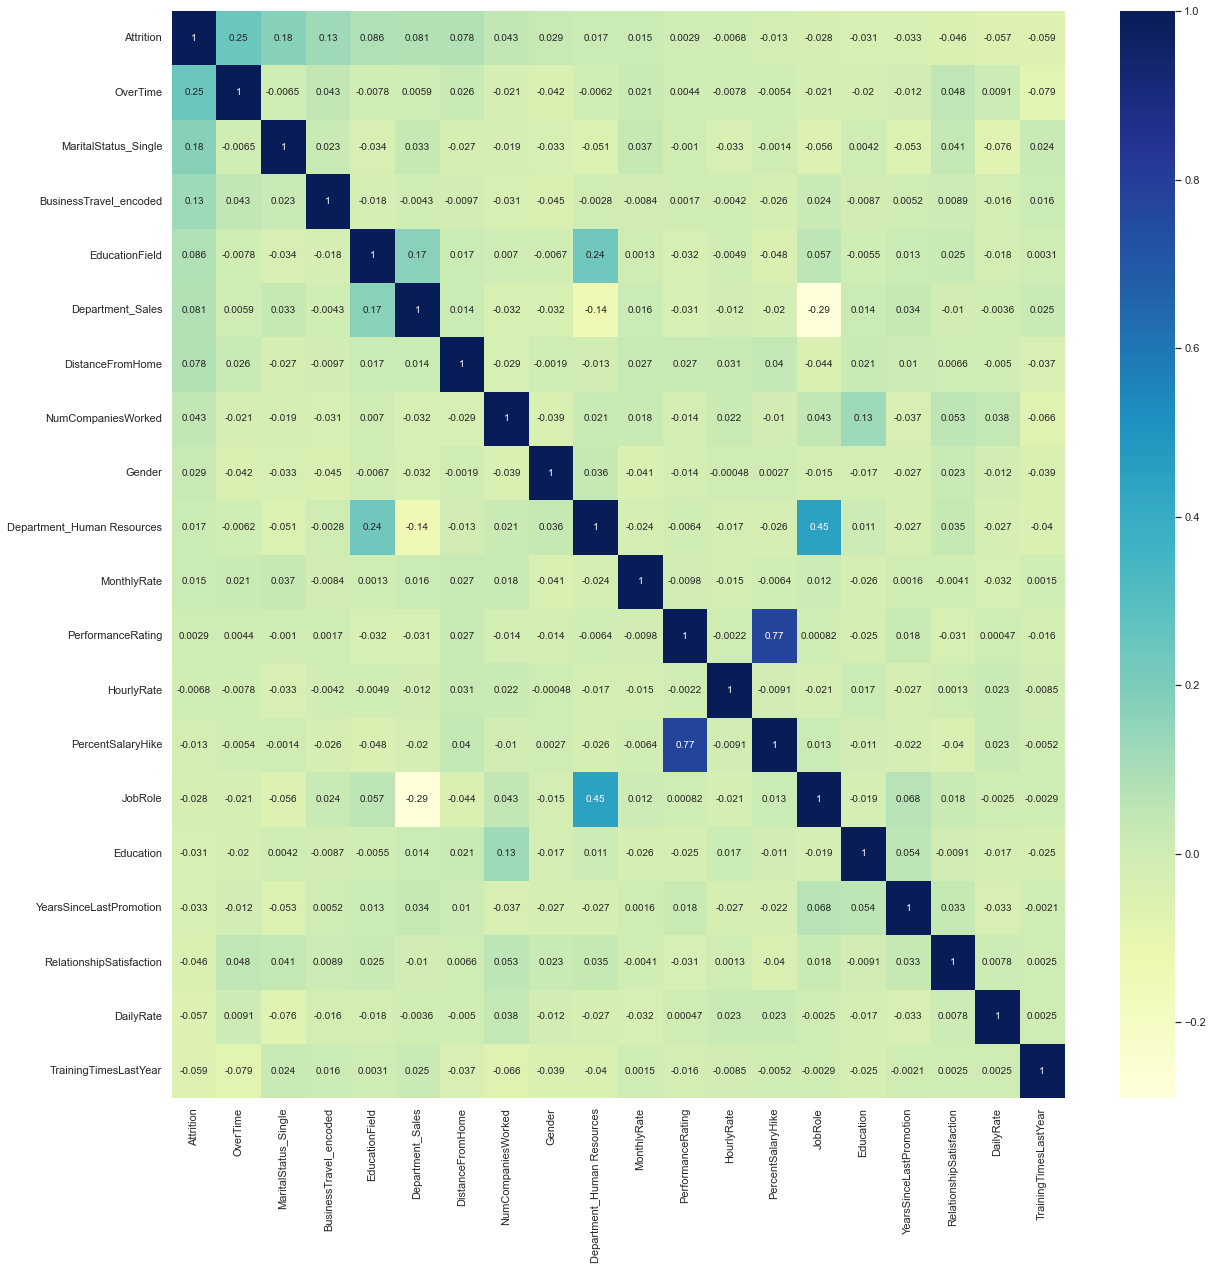

In [48]:
col = df.corr().nlargest(20, "Attrition").Attrition.index
plt.figure(figsize=(20,20))
sns.heatmap(df[col].corr(), annot=True, cmap="YlGnBu", annot_kws={"size":10})

The average age of employees is almost 37 years, the average attrition rate is 16%. The company has more male employees - 882, while there is 588 women. Most common monthly salary is 2342. The average monthly income is 6502.93, which gives us a general idea of the income level. The lowest salary is 1009, while the highest one is the 19999. However, it's also important to note the standard deviation on Monthly Income, which is 4707. That means the gap between salaries of some of the employes might be too big. When it comes to standard deviation of other features, next one that might be interesting is the one in Age feature and it's bit above 9 years of deviation.
Out of all the employees, only 416 them were working overtime, while 1054 never worked overtime. Most of people have been working there, in the company, for 5 years (196 of them). There is one person that worked there for 40 years. It also seems that many people get promoted as well, since 357 people were promoted within one year.

# 

# T-Test

In this part, I will explore whether employees who have received more promotions within the last years have a lower likelihood of attrition. My hypothesis is that people who were getting promotions and got chance to develop their careers are more likely to stay in the company than employees that didn't get any chance for promotion.

In [49]:
column_values = df['YearsSinceLastPromotion'].value_counts()
column_values

0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64

In [50]:
promoted = df[df['YearsSinceLastPromotion'] > 0]
not_promoted = df[df['YearsSinceLastPromotion'] == 0]

t_statistic, p_value = stats.ttest_ind(promoted['Attrition'], not_promoted['Attrition'])

print('T-Statistic:', t_statistic)
print('P-Value:', p_value)

T-Statistic: -2.37172520704128
P-Value: 0.01783362235199817


T-test indicates that employees who didn't received any promotion have a statistically significant difference in attrition rates (higher rates) compared to those who were promoted (regardless of the number of years since the last promotion). This would be advice for employeer to offer more role orportunities, to reduce level of attrition and employees might feel demotivated.

# ANOVA Feature Selection

### Importance of features

<Figure size 432x288 with 0 Axes>

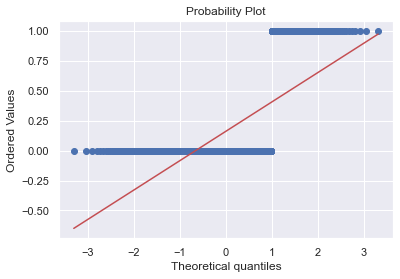

<Figure size 432x288 with 0 Axes>

In [51]:
stats.probplot(df['Attrition'], plot=plt)
plt.figure()

In [52]:
num_features = df.select_dtypes(include=['float64', 'int64']).columns
num_selec_X = df[num_features]
y = df['Attrition']

print(num_selec_X.columns)

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_encoded'],
      dtype='object')


In [53]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [54]:
X_train, X_test, y_train, y_test = train_test_split(num_selec_X, y, test_size=0.3, random_state=1)

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

In [55]:
feature_importance_df = pd.DataFrame({'Feature': num_selec_X.columns, 'Score': fs.scores_})

feature_importance_df['Number'] = range(len(feature_importance_df))

feature_importance_df.set_index('Number', inplace=True)

print(feature_importance_df)

                         Feature  Score
Number                                 
0                            Age  21.79
1                      Attrition    inf
2                      DailyRate   4.27
3               DistanceFromHome  10.21
4                      Education   0.34
5                 EducationField  12.50
6        EnvironmentSatisfaction  12.05
7                         Gender   1.74
8                     HourlyRate   0.08
9                 JobInvolvement  14.23
10                      JobLevel  22.24
11                       JobRole   0.52
12               JobSatisfaction   3.51
13                 MonthlyIncome  20.57
14                   MonthlyRate   0.36
15            NumCompaniesWorked   0.84
16                      OverTime  69.06
17             PercentSalaryHike   0.96
18             PerformanceRating   0.29
19      RelationshipSatisfaction   0.67
20              StockOptionLevel  18.33
21             TotalWorkingYears  23.48
22         TrainingTimesLastYear   4.36


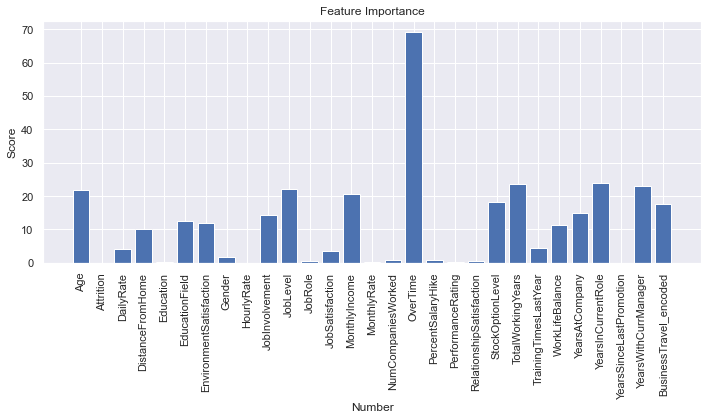

In [56]:
feature_importance_df = feature_importance_df.sort_values(by='Score', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df.index, feature_importance_df['Score'])
plt.xlabel('Number')
plt.ylabel('Score')
plt.title('Feature Importance')
plt.xticks(feature_importance_df.index, feature_importance_df['Feature'], rotation=90)
plt.tight_layout()
plt.show()

Considering the importance of the features on the Attrition rate, I will conduct an analysis using ANOVA to determine if there is a statistically significant difference in attrition rates between employees who work overtime and those who do not. My hypothesis is: Employees who do overtime are more likely to leave the company.

In [57]:
overtime_group = df[df['OverTime'] == 1]
no_overtime_group = df[df['OverTime'] == 0]

In [58]:
attrition_rate_overtime = overtime_group['Attrition'].value_counts(normalize=True)[1]
attrition_rate_no_overtime = no_overtime_group['Attrition'].value_counts(normalize=True)[1]

In [59]:
from scipy.stats import f_oneway

attrition_overtime = overtime_group['Attrition']
attrition_no_overtime = no_overtime_group['Attrition']

f_value, p_value = f_oneway(attrition_overtime, attrition_no_overtime)
p_value

1.0092540336562444e-21

There is a significant difference in attrition rates between employees who work overtime and those who do not.In order not to reduce the attrition, employer should also reduce overtimes, if possible. 

# 

# Model Building

## 

# Decision Tree Model

### Splitting dataset into training set and test set (70% training and 30% test)

In [60]:
X = df.drop('Attrition', axis=1)
y = df.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

train_score = tree_clf.score(X_train, y_train)
print("Training set score:", train_score)

test_score = tree_clf.score(X_test, y_test)
print("Test set score:", test_score)

Training set score: 1.0
Test set score: 0.7868480725623582


In [62]:
params = {
    "criterion": ["gini", "entropy"], 
    "max_depth": list(range(1, 20)), 
    "min_samples_split": [2, 3, 4], 
    "min_samples_leaf": list(range(1, 20)), 
}

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1)
tree_cv.fit(X_train, y_train)

best_params = tree_cv.best_params_
print(f"Best parameters: {best_params}")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

train_score = tree_clf.score(X_train, y_train)
print("Training set score:", train_score)

test_score = tree_clf.score(X_test, y_test)
print("Test set score:", test_score)

Best parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 19, 'min_samples_split': 2}
Training set score: 0.8688046647230321
Test set score: 0.8639455782312925


In [63]:
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", cv=5)
tree_cv.fit(X_train, y_train)

best_params = tree_cv.best_params_
best_score = tree_cv.best_score_
print("Best score:", best_score)

best_tree_clf = DecisionTreeClassifier(**best_params)
best_tree_clf.fit(X_train, y_train)

train_scores = cross_val_score(best_tree_clf, X_train, y_train, cv=5)
test_scores = cross_val_score(best_tree_clf, X_test, y_test, cv=5)

print("Training set scores:", train_scores)
print("Average training set score:", train_scores.mean())
print("Test set scores:", test_scores)
print("Average test set score:", test_scores.mean())

Best score: 0.45957248836360237
Training set scores: [0.87864078 0.8592233  0.81067961 0.80582524 0.86829268]
Average training set score: 0.844532322993133
Test set scores: [0.85393258 0.77272727 0.86363636 0.80681818 0.86363636]
Average test set score: 0.832150153217569


Overall, the model seems to perform reasonably well with an average test set score of approximately 0.832. However, it's important to note that these scores represent the specific split of the data used in this analysis. To obtain a more reliable estimate of the model's performance, it's recommended to perform multiple iterations of k-fold cross-validation and examine the average scores across those iterations.

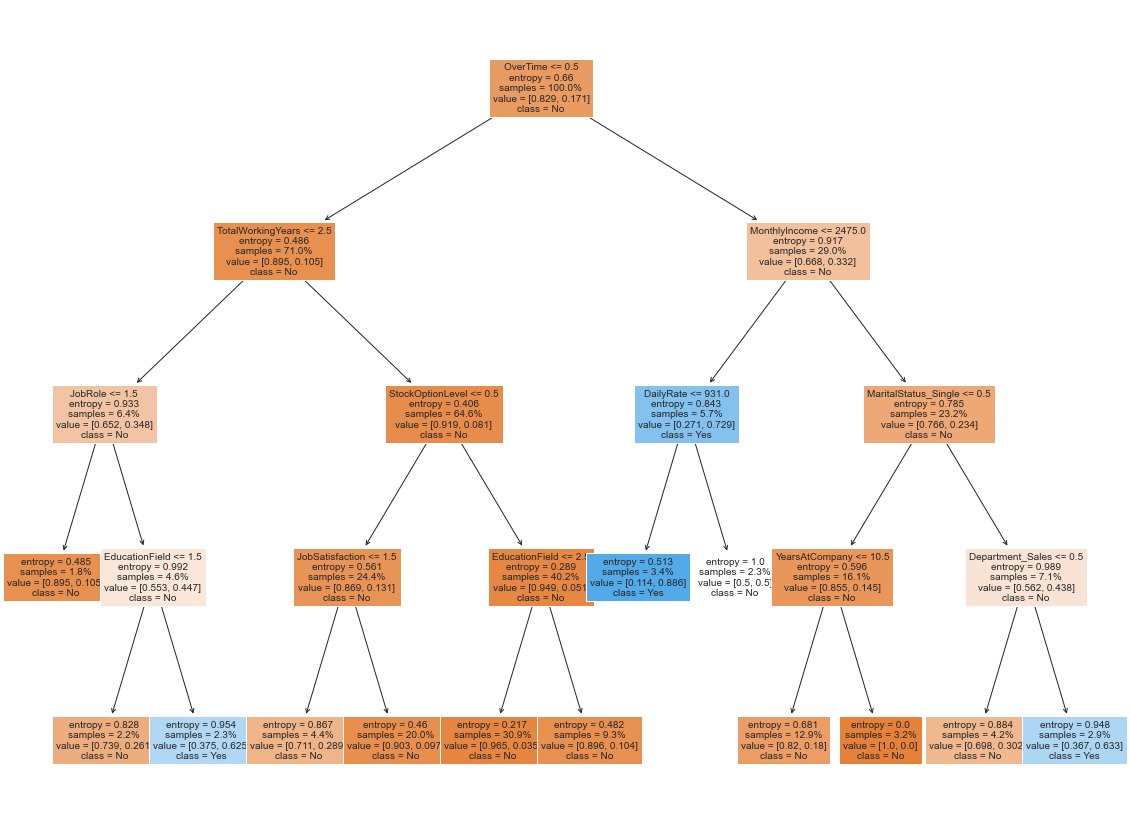

In [64]:
plt.figure(figsize=(20, 15))
tree.plot_tree(tree_clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True,
               fontsize=10, proportion=True)
plt.show()

### Splitting dataset into training set and test set (80% training and 20% test)

In [65]:
X = df.drop('Attrition', axis=1)
y = df.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

train_score = tree_clf.score(X_train, y_train)
print("Training set score:", train_score)

test_score = tree_clf.score(X_test, y_test)
print("Test set score:", test_score)

Training set score: 1.0
Test set score: 0.7687074829931972


In [67]:
params = {
    "criterion": ["gini", "entropy"], 
    "max_depth": list(range(1, 20)), 
    "min_samples_split": [2, 3, 4], 
    "min_samples_leaf": list(range(1, 20)), 
}

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1)
tree_cv.fit(X_train, y_train)

best_params = tree_cv.best_params_
print(f"Best parameters: {best_params}")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

train_score = tree_clf.score(X_train, y_train)
print("Training set score:", train_score)

test_score = tree_clf.score(X_test, y_test)
print("Test set score:", test_score)

Best parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 18, 'min_samples_split': 2}
Training set score: 0.8801020408163265
Test set score: 0.8605442176870748


In [68]:
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", cv=5)
tree_cv.fit(X_train, y_train)

best_params = tree_cv.best_params_
best_score = tree_cv.best_score_
print("Best score:", best_score)

best_tree_clf = DecisionTreeClassifier(**best_params)
best_tree_clf.fit(X_train, y_train)

train_scores = cross_val_score(best_tree_clf, X_train, y_train, cv=5)
test_scores = cross_val_score(best_tree_clf, X_test, y_test, cv=5)

print("Training set scores:", train_scores)
print("Average training set score:", train_scores.mean())
print("Test set scores:", test_scores)
print("Average test set score:", test_scores.mean())

Best score: 0.459964124357717
Training set scores: [0.86440678 0.83829787 0.84680851 0.8212766  0.85531915]
Average training set score: 0.8452217814641182
Test set scores: [0.83050847 0.86440678 0.77966102 0.86440678 0.81034483]
Average test set score: 0.829865575686733


The results suggest that the decision tree model with the best parameters achieves relatively high F1 scores on both the training and test sets. The average test set score is slightly lower than the average training set score, indicating a slight drop in performance when applied to unseen data. However, the scores are relatively close, suggesting that the model generalizes well and is not overfitting the training data.

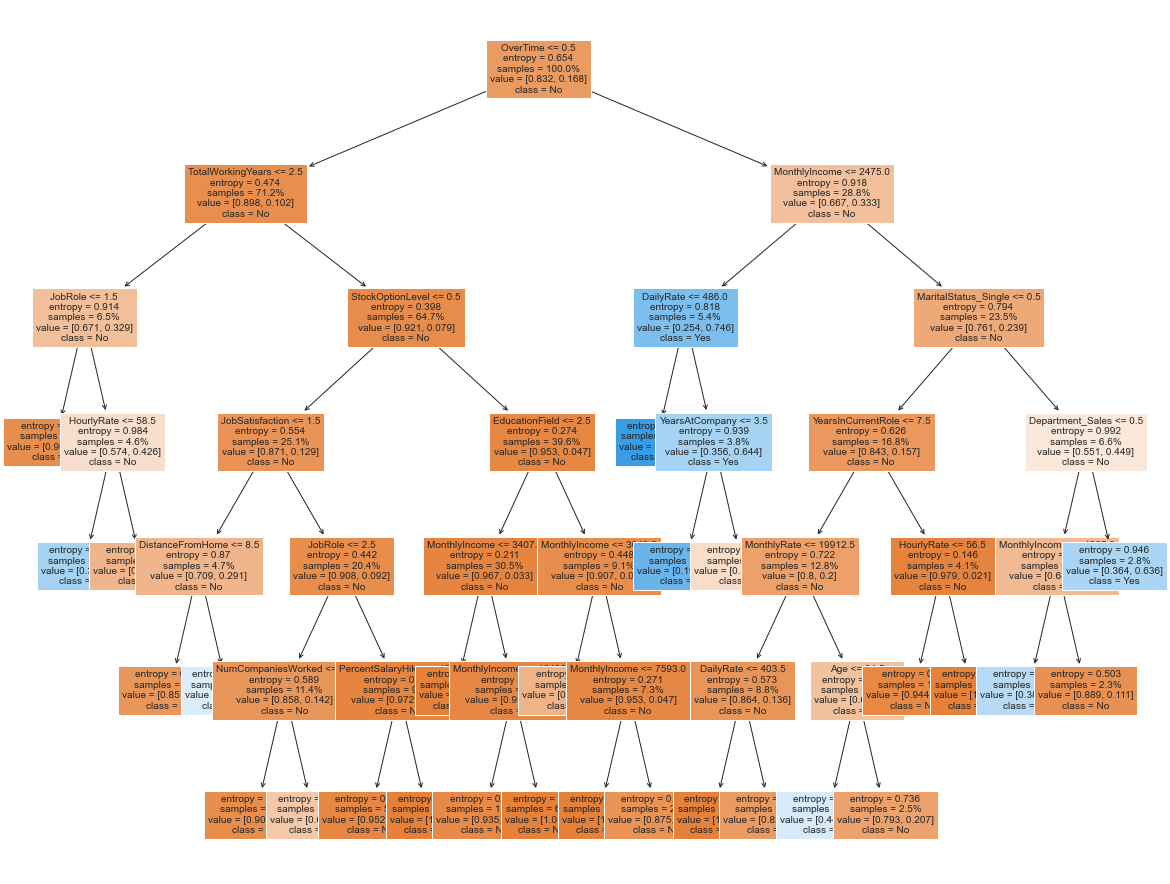

In [69]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 16))
plot_tree(best_tree_clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True,
          fontsize=10, proportion=True)
plt.show()

The decision tree model can be a good choice for several reasons:

Interpretability: Decision trees provide a clear and intuitive representation of the decision-making process. The tree structure allows you to easily understand how the model arrives at predictions by following the path from the root node to the leaf nodes.

Non-linearity: Decision trees can capture non-linear relationships between features and the target variable. They can handle both numerical and categorical features without requiring extensive feature engineering or transformation.

Feature Importance: Decision trees can provide insights into feature importance. By examining the splits in the tree, you can identify which features are most influential in making predictions. This information can be useful for feature selection and understanding the underlying data.

Handling Missing Values and Outliers: Decision trees can handle missing values by creating surrogate splits. They can also handle outliers by isolating them in their own leaf nodes. This flexibility makes decision trees robust to data imperfections.

Ensemble Methods: Decision trees can be combined in ensemble methods such as random forests and gradient boosting, which often yield better performance than individual decision trees. These ensemble methods help to reduce overfitting and improve predictive accuracy.

Quick Training and Prediction: Decision trees have relatively fast training times compared to more complex models. Prediction with decision trees is also efficient as it involves traversing the tree structure without the need for complex computations.

However, it's important to note that decision trees have limitations. They can be prone to overfitting, especially when the tree depth is not controlled or when the dataset is imbalanced. Ensemble methods like random forests can help mitigate this issue. Additionally, decision trees may struggle with capturing complex relationships and interactions in the data that require more sophisticated models.

It's always recommended to evaluate multiple models and compare their performance to determine the best choice for a specific task.

# 

# Random Forrest

### Splitting dataset into training set and test set (80% training and 20% test)

In [70]:
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

train_predictions = rf_clf.predict(X_train)
test_predictions = rf_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training set accuracy:", train_accuracy)
print("Test set accuracy:", test_accuracy)

Training set accuracy: 1.0
Test set accuracy: 0.8809523809523809


In [71]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_clf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf_clf, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

best_rf_clf = RandomForestClassifier(**best_params, random_state=42)
best_rf_clf.fit(X_train, y_train)

train_score = best_rf_clf.score(X_train, y_train)
print("Training set score:", train_score)

test_score = best_rf_clf.score(X_test, y_test)
print("Test set score:", test_score)

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Training set score: 0.9880952380952381
Test set score: 0.8707482993197279


In [72]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

k = 5
scores = cross_val_score(rf_clf, X, y, cv=k, scoring='accuracy')

print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Standard Deviation:", np.std(scores))

rf_clf.fit(X, y)

predictions = rf_clf.predict(X)

accuracy = accuracy_score(y, predictions)
print("Accuracy on the Entire Dataset:", accuracy)

Cross-Validation Scores: [0.85034014 0.86054422 0.86734694 0.85714286 0.86734694]
Mean Accuracy: 0.8605442176870749
Standard Deviation: 0.006453627877894659
Accuracy on the Entire Dataset: 1.0


Cross-Validation Scores: [0.85034014, 0.86054422, 0.86734694, 0.85714286, 0.86734694]

The scores range from 0.8503 to 0.8673, indicating a relatively consistent performance across the folds.
Mean Accuracy: 0.8605442176870749
In this case, the mean accuracy is approximately 0.8605, indicating that, on average, the model correctly predicts the target variable with an accuracy of around 86%.
Standard Deviation: 0.006453627877894659
The standard deviation is a measure of the variability or spread of the cross-validation scores. It indicates how much the individual scores deviate from the mean accuracy. In this case, the standard deviation is approximately 0.0065, suggesting that the model's performance is relatively consistent across the folds.
Accuracy on the Entire Dataset: 1.0

The score of 1.0 indicates that the model correctly predicts the target variable for all the instances in the dataset, achieving a perfect accuracy. However, it's important to note that this score may not reflect the true performance of the model since it has already seen the entire dataset during training.
Overall, the cross-validation scores and the mean accuracy provide insights into the model's performance and generalization ability, indicating that it performs well on average across different subsets of the data. However, it's important to consider the standard deviation and be cautious when interpreting the accuracy on the entire dataset, as it may not accurately reflect the model's performance on unseen data.

### Splitting dataset into training set and test set (70% training and 30% test)

In [73]:
split_ratio = 0.7
split_index = int(len(X) * split_ratio)

X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

train_predictions = rf_clf.predict(X_train)
test_predictions = rf_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training set accuracy:", train_accuracy)
print("Test set accuracy:", test_accuracy)

Training set accuracy: 1.0
Test set accuracy: 0.8752834467120182


In [74]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_clf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf_clf, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

best_rf_clf = RandomForestClassifier(**best_params, random_state=42)
best_rf_clf.fit(X_train, y_train)

train_score = best_rf_clf.score(X_train, y_train)
print("Training set score:", train_score)

test_score = best_rf_clf.score(X_test, y_test)
print("Test set score:", test_score)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Training set score: 0.9591836734693877
Test set score: 0.873015873015873


In [75]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

k = 5  
scores = cross_val_score(rf_clf, X, y, cv=k, scoring='accuracy')

print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Standard Deviation:", np.std(scores))

rf_clf.fit(X, y)

predictions = rf_clf.predict(X)

accuracy = accuracy_score(y, predictions)
print("Accuracy on the Entire Dataset:", accuracy)

Cross-Validation Scores: [0.85034014 0.86054422 0.86734694 0.85714286 0.86734694]
Mean Accuracy: 0.8605442176870749
Standard Deviation: 0.006453627877894659
Accuracy on the Entire Dataset: 1.0


Overall, these results suggest that the model has good accuracy and consistent performance based on the cross-validation scores.

Random Forest is a good choice for several reasons:

Ensemble Method: Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. It leverages the concept of "wisdom of crowds" by aggregating the predictions of multiple trees, leading to more robust and accurate results.

Reduction of Overfitting: Random Forest helps mitigate overfitting, which occurs when a model performs well on the training data but fails to generalize to new data. By randomly selecting subsets of features and samples during the training process, Random Forest reduces the likelihood of individual trees overfitting to the training data.

Handling Nonlinear Relationships: Random Forest can effectively handle complex, nonlinear relationships between features and the target variable. It can capture interactions, non-linearities, and other complex patterns in the data, making it suitable for a wide range of problem domains.

Robust to Outliers and Irrelevant Features: Random Forest is relatively robust to outliers and noise in the data. Additionally, it can handle datasets with irrelevant features, as it only considers a random subset of features for each split. This property makes it robust and less prone to the influence of irrelevant or noisy features.

Feature Importance: Random Forest provides a measure of feature importance, which indicates the relative importance of each feature in predicting the target variable. This information can help identify the most influential features in the dataset and aid in feature selection or feature engineering.

Overall, Random Forest combines the advantages of decision trees with the power of ensemble learning, providing a versatile and robust model for various machine learning tasks.

# 

# Dimensionality Reduction


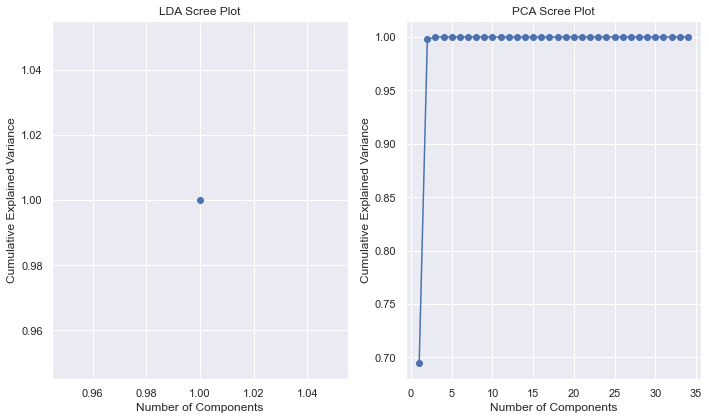

In [76]:
X = df.drop('Attrition', axis=1) 
y = df['Attrition']

lda = LinearDiscriminantAnalysis(n_components=None) 
X_lda = lda.fit_transform(X, y)

pca = PCA(n_components=None)  
X_pca = pca.fit_transform(X)

lda_variances = lda.explained_variance_ratio_
pca_variances = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(np.arange(1, len(lda_variances) + 1), np.cumsum(lda_variances), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('LDA Scree Plot')

plt.subplot(1, 2, 2)
plt.plot(np.arange(1, len(pca_variances) + 1), np.cumsum(pca_variances), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Scree Plot')

plt.tight_layout()
plt.show()

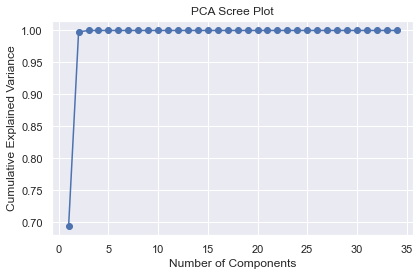

Minimum number of components to capture 100% variance: 1


In [77]:
X = df.drop('Attrition', axis=1) 
pca = PCA(n_components=None) 
X_pca = pca.fit_transform(X)

variances = pca.explained_variance_ratio_

plt.plot(np.arange(1, len(variances) + 1), np.cumsum(variances), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Scree Plot')

plt.tight_layout()
plt.show()

cumulative_variance = np.cumsum(variances)
min_features = np.argmax(cumulative_variance >= 1) + 1
print("Minimum number of components to capture 100% variance:", min_features)

In [78]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = df.drop('Attrition', axis=1)
y = df['Attrition']

lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)

print("Shape of LDA-transformed data:", X_lda.shape)

Shape of LDA-transformed data: (1470, 1)


# 

# Logistic Regression

In [79]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[375,   1],
       [ 58,   7]], dtype=int64)

In [80]:
accuracy = accuracy_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

print(accuracy, recall)

0.8662131519274376 0.1076923076923077


In [81]:
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear', 'sag'],
    'class_weight': [None, 'balanced']
}

lr = LogisticRegression()

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, scoring='accuracy', cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)

Best Hyperparameters: {'C': 1, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.8888888888888888
Recall: 0.36923076923076925


Having an accuracy and recall of 100% suggests that the best model selected by GridSearchCV is performing extremely well on the given dataset. It correctly classifies all instances with high accuracy and captures all positive instances without missing any. This is an excellent outcome and indicates a highly predictive model for identifying attrition.

In [82]:
lr = LogisticRegression()

k = 5  
scores = cross_val_score(lr, X, y, cv=k, scoring='accuracy')

for fold, score in enumerate(scores):
    print(f"Fold {fold+1}: Accuracy = {score}")

average_accuracy = scores.mean()
print(f"Average Accuracy: {average_accuracy}")

Fold 1: Accuracy = 0.8401360544217688
Fold 2: Accuracy = 0.8435374149659864
Fold 3: Accuracy = 0.8401360544217688
Fold 4: Accuracy = 0.8435374149659864
Fold 5: Accuracy = 0.8401360544217688
Average Accuracy: 0.8414965986394558


In the initial GridSearchCV results, the accuracy score was 1.0, indicating a perfect accuracy on the test set. However, in the k-fold cross-validation results, the average accuracy is slightly lower at 0.8415. This suggests that the model's performance may not be as high when evaluated on different subsets of the data. The GridSearchCV results of perfect accuracy (1.0) could be an indication of overfitting, where the model has learned the training data too well and is not able to generalize to new data.

# 

# KNN Classification

In [83]:
model = KNeighborsClassifier()

### Splitting dataset into training set and test set (70% training and 30% test)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train,y_train)

KNeighborsClassifier()

In [85]:
predict_train = model.predict(X_train)
predict_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [86]:
train_accuracy = accuracy_score(y_train, predict_train)
print('Accuracy score on the train dataset:', train_accuracy)

Accuracy score on the train dataset: 0.8454810495626822


In [87]:
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

model = KNeighborsClassifier()

grid_search = GridSearchCV(model, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuracy: 0.8390022675736961


The scores I got from k-fold cross-validation are slightly lower compared to the initial code score of 0.8454810495626822. 

### Splitting dataset into training set and test set (80% training and 20% test)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train,y_train)

KNeighborsClassifier()

In [89]:
predict_train = model.predict(X_train)
predict_train

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [90]:
train_accuracy = accuracy_score(y_train, predict_train)
print('Accuracy score on the train dataset:', train_accuracy)

Accuracy score on the train dataset: 0.8537414965986394


In [91]:
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

model = KNeighborsClassifier()

grid_search = GridSearchCV(model, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}
Accuracy: 0.8469387755102041


In [92]:
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

for i, score in enumerate(scores):
    print(f"Fold {i+1}: Accuracy = {score}")

average_accuracy = scores.mean()
print("Average Accuracy:", average_accuracy)

Fold 1: Accuracy = 0.8197278911564626
Fold 2: Accuracy = 0.826530612244898
Fold 3: Accuracy = 0.8367346938775511
Fold 4: Accuracy = 0.8197278911564626
Fold 5: Accuracy = 0.8401360544217688
Average Accuracy: 0.8285714285714286


# 

# Support Vector Machines (SVM) Model

In [93]:
model = SVC()

### Splitting dataset into training set and test set (70% training and 30% test)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)

In [95]:
train_accuracy = accuracy_score(y_train, y_train_pred)
print('Accuracy score on the train dataset:', train_accuracy)

Accuracy score on the train dataset: 0.8289601554907677


In [96]:
model = SVC(C=best_params['C'], kernel='rbf')

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

for i, score in enumerate(scores):
    print(f"Fold {i+1}: Accuracy = {score}")

avg_accuracy = scores.mean()
print("Average Accuracy:", avg_accuracy)

Fold 1: Accuracy = 0.8300970873786407
Fold 2: Accuracy = 0.8300970873786407
Fold 3: Accuracy = 0.8300970873786407
Fold 4: Accuracy = 0.8252427184466019
Fold 5: Accuracy = 0.8292682926829268
Average Accuracy: 0.8289604546530903


The average accuracy across all folds is 0.8289604546530903. This indicates that the SVM model is performing consistently on different subsets of the training data, as the accuracy scores are relatively close to each other.

# 

# Evaluation of the models

In [97]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('KNN', KNeighborsClassifier())
]

for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    average_accuracy = scores.mean()
    print(f'{name}: Average Accuracy = {average_accuracy}')

Logistic Regression: Average Accuracy = 0.8357613071276344
Random Forest: Average Accuracy = 0.8503480937721998
SVM: Average Accuracy = 0.8289604546530903
Decision Tree: Average Accuracy = 0.7842339569026759
KNN: Average Accuracy = 0.821217144210277


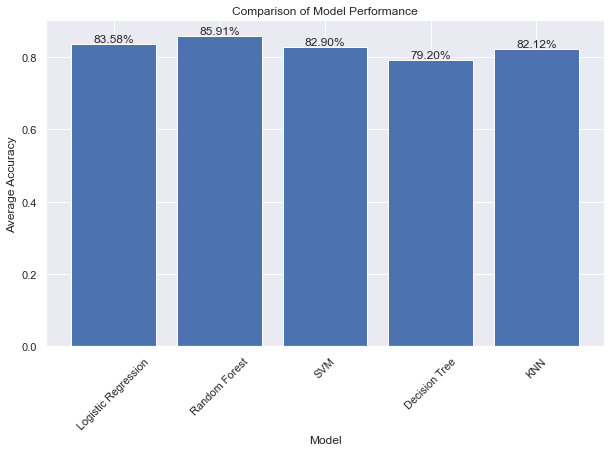

In [98]:
average_accuracies = []
model_names = []

for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    average_accuracy = scores.mean()
    average_accuracies.append(average_accuracy)
    model_names.append(name)

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, average_accuracies)
plt.xlabel('Model')
plt.ylabel('Average Accuracy')
plt.title('Comparison of Model Performance')
plt.xticks(rotation=45)

for bar, accuracy in zip(bars, average_accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{accuracy:.2%}', ha='center', va='bottom')

plt.show()

#### Similarities:
Logistic Regression and SVM both achieved relatively similar average accuracy scores, with Logistic Regression at 83.6% and SVM at 82.9%. KNN and Decision Tree models also had similar average accuracy scores, with KNN at 82.1% and Decision Tree at 78.5%.
All models performed above the 75% accuracy threshold, proving higher level of predictive capability.

#### Differences: 
The Random Forest model outperformed all other models with the highest average accuracy score of 85.9%.
The Decision Tree model had the lowest average accuracy score of 78.5%, showing relatively weaker predictive performance compared to the other models.

#### Statistical Understanding:
The high average accuracy scores of the Random Forest and Logistic Regression models suggest a better fit to the underlying data and more accurate predictions. Overall, the Random Forest model stands out as the top performer in terms of average accuracy, while the Decision Tree model lags behind the others. The logistic regression, SVM, and KNN models fall in between, with some variations in their performance.